# Dataset and Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
#training data
Path1="/content/drive/MyDrive/SemII/CMPE788/Dataset/classes_csvs/video/iscx_voip_REG.csv"
df1 = pd.read_csv(Path1, low_memory=False)
df1.columns

In [ ]:
#testing data
Path2="/content/drive/MyDrive/SemII/CMPE788/Dataset/classes_csvs/chat/voip_VPN.csv"
df2 = pd.read_csv(Path2, low_memory=False)
df2.columns

In [ ]:
#Combined testing data
Path3="/content/drive/MyDrive/SemII/CMPE788/Dataset/classes_csvs/chat/voip_Combined.csv"
df3 = pd.read_csv(Path3, low_memory=False)
df3.columns

In [ ]:
flow_counts = df1['Flow ID'].value_counts()
# print(flow_counts)

labels = flow_counts.index
sizes = flow_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')

plt.title('Application Distribution - Non VPN/tor')

plt.show() 

In [ ]:
flow_counts = df2['Flow ID'].value_counts()

labels = flow_counts.index
sizes = flow_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')

plt.title('Application Distribution - VPN/tor')

plt.show()

# Feature Selection

In [ ]:
# Compute the correlation matrix
corr_matrix = df1.corr()

# Extract the correlation coefficients between each column and the target column
target_corr = corr_matrix['Label']

# Print the correlation coefficients in descending order
print(target_corr.sort_values(ascending=False))

# Data Preprocessing


In [ ]:
# Drop unnecessary columns
df1.drop(['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol'], axis=1, inplace=True)

# Check for missing values
print(df1.isnull().sum())

# Impute missing values with mean
df1.fillna(df1.mean(), inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['Label'] = label_encoder.fit_transform(df1['Label'])

# Normalize/Scale numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[df1.columns[:-1]] = scaler.fit_transform(df1[df1.columns[:-1]])

# Naive Bayes Classifier


In [ ]:
from sklearn.model_selection import train_test_split

X = df1.drop('Label', axis=1) #features
y = df1['Label'] #target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# create an instance of the classifier
gnb = GaussianNB()

# train the classifier on the training data
gnb.fit(X_train, y_train)


In [ ]:
# make predictions on the testing data
y_pred = gnb.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

# compute the accuracy of the classifier on the testing data
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)


Accuracy: 0.6875


In [ ]:
# calculate the F1 score for the predicted labels
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')

# print the F1 score
print("F1 score:", f1) 


F1 score: 0.6125


### Applying the NBC to new data

In [ ]:
# Drop unnecessary columns
df2.drop(['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol'], axis=1, inplace=True)

# Check for missing values
print(df2.isnull().sum())

# Impute missing values with mean
df2.fillna(df2.mean(), inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2['Label'] = label_encoder.fit_transform(df2['Label'])

# Normalize/Scale numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2[df2.columns[:-1]] = scaler.fit_transform(df2[df2.columns[:-1]])

In [ ]:
# make predictions on the new data
y_pred_e1 = gnb.predict(df2.drop('Label', axis=1))

# print the predicted labels
# print(y_pred_e1)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# extract the true labels from df2
y_true_e1 = df2['Label']

# calculate the accuracy of the new predictions
accuracy_e1 = accuracy_score(y_true_e1, y_pred_e1)

# calculate the F1 score for the new predictions
f1_e1 = f1_score(y_true_e1, y_pred_e1, average='weighted')

# print the accuracy and F1 score for the new predictions
print('New data accuracy:', accuracy_e1)
print('New data F1 score:', f1_e1)


### Applying the NBC to a combination of old and new data

In [ ]:
# Drop unnecessary columns
df3.drop(['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol'], axis=1, inplace=True)

# Check for missing values
print(df3.isnull().sum())

# Impute missing values with mean
df3.fillna(df3.mean(), inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df3['Label'] = label_encoder.fit_transform(df3['Label'])

# Normalize/Scale numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[df3.columns[:-1]] = scaler.fit_transform(df1[df3.columns[:-1]])

In [ ]:
# make predictions on the new data
y_pred_e2 = gnb.predict(df3.drop('Label', axis=1))

# print the predicted labels
# print(y_pred_new)
 

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# extract the true labels from df2
y_true_e2 = df3['Label']

# calculate the accuracy of the new predictions
accuracy_e2 = accuracy_score(y_true_e2, y_pred_e2)

# calculate the F1 score for the new predictions
f1_e2 = f1_score(y_true_e2, y_pred_e2, average='weighted')

# print the accuracy and F1 score for the new predictions
print('New data accuracy:', accuracy_e2)
print('New data F1 score:', f1_e2)


### Comparing the NBC results

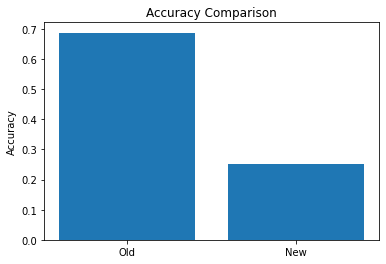

In [ ]:
import matplotlib.pyplot as plt

accuracy_values = [accuracy, accuracy_e2]

# create a bar plot of the accuracy values
fig, ax = plt.subplots()
ax.bar(['Old', 'New'], accuracy_values)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
plt.show()


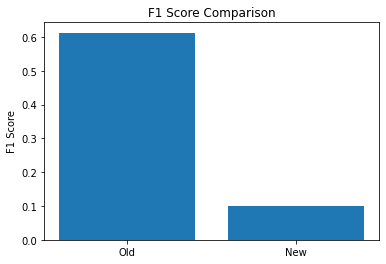

In [ ]:
import matplotlib.pyplot as plt

f1_values = [f1, f1_e2]

# create a bar plot of the F1 score values
fig, ax = plt.subplots()
ax.bar(['Old', 'New'], f1_values)
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score Comparison')
plt.show()


# Feed Forward Neural Net


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into train and test sets
X = df1.drop('Label', axis=1)
y = df1['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42)

# Perform standard scaling on the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a sequential FFNN model
model = Sequential()

# Add input layer with the number of features as input_dim
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add hidden layers
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))

# Add output layer with sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the preprocessed data
model.fit(X_train_scaled, y_train, epochs=500, batch_size=32)

# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


In [ ]:
# Evaluate the model on test data
X_test = df2.drop('Label', axis=1)
y_test = df2['Label']

# Normalize test data if needed
X_test_scaled = scaler.transform(X_test)

# Obtain model predictions
y_pred = model.predict(X_test_scaled)

# Convert predictions to binary labels (0 or 1) based on a threshold 
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = (y_pred_binary.flatten() == y_test.values).mean()
print("Accuracy: ", accuracy)


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Layer Freezing 
Started by creating my own base model, which is similar to the original model. Then compiled and trained the base model on the data. After that, created a new model transfer_model for transfer learning, and added the same layers as in the base model. Transfered the weights from the base model to the transfer model using the set_weights() method. Compiled and trained the transfer model on the original data, and evaluated it on the test data.



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into train and test sets
X = df1.drop('Label', axis=1)
y = df1['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42)

# Perform standard scaling on the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

####
X2 = df2.drop('Label', axis=1)
y2 = df2['Label']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.08, random_state=42)
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)
####

# Create a sequential FFNN model
model = Sequential()

# Add input layer with the number of features as input_dim
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1], trainable=False)) # Freeze the initial layer

# Add hidden layers
model.add(Dense(units=128, activation='relu', trainable=False))
model.add(Dense(units=64, activation='relu'))

# Add output layer with sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the preprocessed data
model.fit(X_train_scaled, y_train, epochs=500, batch_size=32)

# Evaluate the model on the test set
X_test_scaled2 = scaler.transform(X_test2)
loss, accuracy = model.evaluate(X_test_scaled2, y_test2)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


# Comparisons

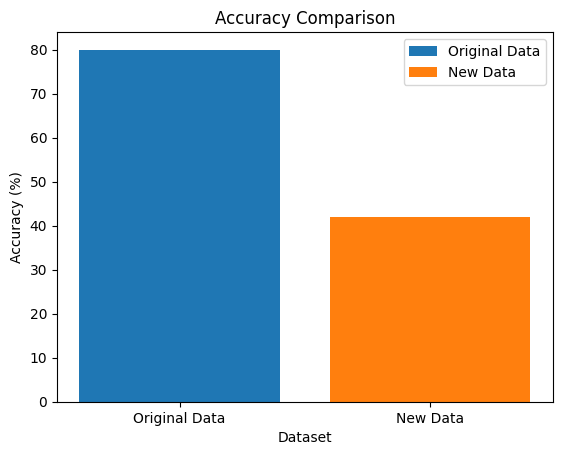

In [ ]:
import matplotlib.pyplot as plt

# Create a bar graph
fig, ax = plt.subplots()
ax.bar('Original Data', accuracy_original_data, label='Original Data')
ax.bar('New Data', accuracy_new_data, label='New Data')

# Add labels and title
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy Comparison')
ax.legend()

# Show the plot
plt.show()


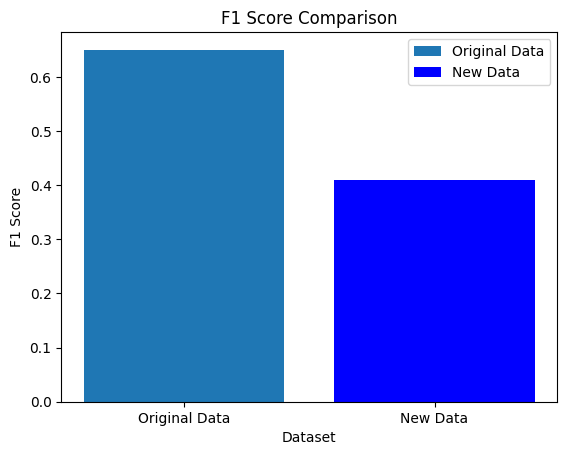

In [ ]:
import matplotlib.pyplot as plt

# Create a bar graph with blue bars
fig, ax = plt.subplots()
ax.bar('Original Data', f1_score_original_data, label='Original Data')
ax.bar('New Data', f1_score_new_data, color='blue', label='New Data')

# Add labels and title
ax.set_xlabel('Dataset')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score Comparison')
ax.legend()

# Show the plot
plt.show()


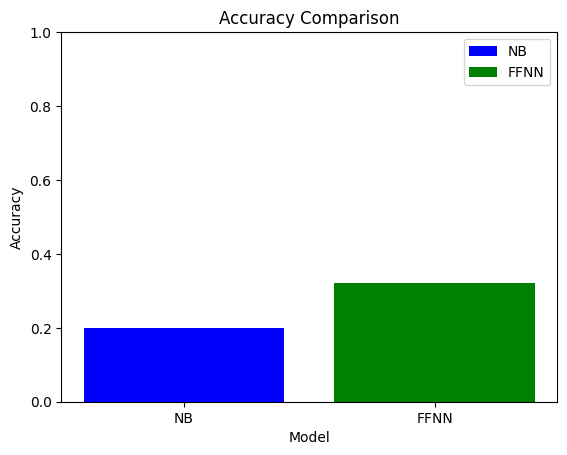

In [ ]:
import matplotlib.pyplot as plt


# Create a bar chart
fig, ax = plt.subplots()
ax.bar('NB', accuracy_nb, color='blue', label='NB')
ax.bar('FFNN', accuracy_ffnn, color='green', label='FFNN')

# Set y-axis limit from 0 to 1
ax.set_ylim([0, 1])

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
ax.legend()

# Show the plot
plt.show()


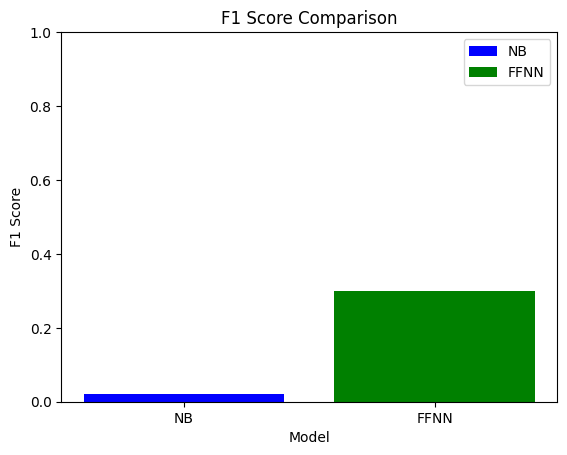

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart
fig, ax = plt.subplots()
ax.bar('NB', f1_nb, color='blue', label='NB')
ax.bar('FFNN', f1_ffnn, color='green', label='FFNN')

# Set y-axis limit from 0 to 1
ax.set_ylim([0, 1])

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score Comparison')
ax.legend()

# Show the plot
plt.show()
